## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [16]:
import pandas as pd
import numpy as nm
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [18]:
data = pd.read_csv('ab_data.csv',header=0)
df = data.drop(["timestamp"],axis=1)
df.head()

user_id      group landing_page  converted
0   851104    control     old_page          0
1   804228    control     old_page          0
2   661590  treatment     new_page          0
3   853541  treatment     new_page          0
4   864975    control     old_page          1

b. Use the below cell to find the number of rows in the dataset.

In [19]:
len(df.index)

294478

c. The number of unique users in the dataset.

In [20]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [21]:
# we suppose (0) is not users converted ,(1) is users converted.
from collections import Counter
Frec_converted = Counter(df["converted"])
print(Frec_converted)

Counter({0: 259241, 1: 35237})


In [22]:
converted = round((35237 / (259241+35237))*100)

print("The proportion of users converted almost is",converted,"%")

The proportion of users converted almost is 12 %


e. The number of times the `new_page` and `treatment` don't line up.

In [23]:
df.groupby(["group","landing_page"]).count()

user_id  converted
group     landing_page                    
control   new_page         1928       1928
          old_page       145274     145274
treatment new_page       145311     145311
          old_page         1965       1965

In [24]:
calc = 1928 + 1965
print("The number of times the new_page and treatment don't line up is",calc)

The number of times the new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [25]:
print(df.isnull().sum())

user_id         0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [26]:
C1 = df[((df.group == 'treatment') & (df.landing_page == 'old_page'))].index
C2 = df[((df.group == 'control') & (df.landing_page == 'new_page'))].index

In [27]:
dff = df.drop(C1)
df2 = dff.drop(C2)
df2.head()

user_id      group landing_page  converted
0   851104    control     old_page          0
1   804228    control     old_page          0
2   661590  treatment     new_page          0
3   853541  treatment     new_page          0
4   864975    control     old_page          1

In [28]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [29]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [30]:
import collections as coll
print([item for item, count in coll.Counter(df2['user_id']).items() if count > 1])

[773192]


c. What is the row information for the repeat **user_id**? 

In [31]:
df2[df2['user_id']==773192]

user_id      group landing_page  converted
1899   773192  treatment     new_page          0
2893   773192  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [32]:
df2.drop([2893], axis=0 , inplace = True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [33]:
Frec_converted = Counter(df2["converted"])
print(Frec_converted)

Counter({0: 255831, 1: 34753})


In [34]:
probability1 = 34753 / (255831+34753)
print("probability of an individual converting regardless of the page they receive is",probability1)

probability of an individual converting regardless of the page they receive is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [35]:
df2.groupby(["group","converted"]).count()

user_id  landing_page
group     converted                       
control   0           127785        127785
          1            17489         17489
treatment 0           128046        128046
          1            17264         17264

In [36]:
probability2 = 17489 / (127785+17489)
print("what is the probability they converted when individual was in the control group is",probability2)

what is the probability they converted when individual was in the control group is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [37]:
probability3 = 17264 / (128046+17264)
print("what is the probability they converted when individual was in the treatment group is",probability3)

what is the probability they converted when individual was in the treatment group is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [38]:
Frec_landing_page = Counter(df2["landing_page"])
print(Frec_landing_page)

Counter({'new_page': 145310, 'old_page': 145274})


In [39]:
probability4 = 145310 / (145310+145274)
print("what is the probability that an individual received the new page is",probability4)

what is the probability that an individual received the new page is 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No , I dont think the new treatment page leads to more conversions because its probability is 0.1188 , on the contrary I think the new control page leads to more conversions because its probability is 0.1204 and the probability that an individual received the new page is 0.5 .Therefore, the probabilities are unbiased for a particular group.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


**H0: $p_{old}$** >= **$p_{new}$**

**H1: $p_{old}$** < **$p_{new}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [40]:
Frec_converted = Counter(df2["converted"])
print(Frec_converted)

Counter({0: 255831, 1: 34753})


In [41]:
pnew = 34753 / (255831+34753)
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [42]:
Frec_converted = Counter(df2["converted"])
print(Frec_converted)

Counter({0: 255831, 1: 34753})


In [43]:
pold = 34753 / (255831+34753)
pold

0.11959708724499628

c. What is $n_{new}$?

In [44]:
Frec_landing_page = Counter(df2["landing_page"])
print(Frec_landing_page)

Counter({'new_page': 145310, 'old_page': 145274})


In [45]:
nnew = 145310

d. What is $n_{old}$?

In [46]:
nold = 145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [47]:
new_page_converted = nm.random.choice([1,0],nnew, p=(pnew,1-pnew)).mean()
new_page_converted

0.12001926914871654

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [48]:
old_page_converted = nm.random.choice([1,0],nold, p=(pold,1-pold)).mean()
old_page_converted

0.12012472982089017

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [49]:
new_page_converted - old_page_converted

-0.00010546067217363786

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [50]:
#Import timeit package..
import timeit
start = timeit.default_timer()

p_diffs = []
size = df.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = nm.random.choice([1,0],nnew, p=(pnew,1-pnew)).mean()
    old_page_converted = nm.random.choice([1,0],nold, p=(pold,1-pold)).mean()
    p_diffs.append(new_page_converted - old_page_converted)
    
#Compute python running time.                   
stop = timeit.default_timer()
print(stop - start) 
                
p_diffs = nm.array(p_diffs)
p_diffs

232.23536700000113


array([ 0.00020457, -0.00055255, -0.0010825 , ..., -0.0017916 ,
        0.00013559, -0.00062131])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Frequency')

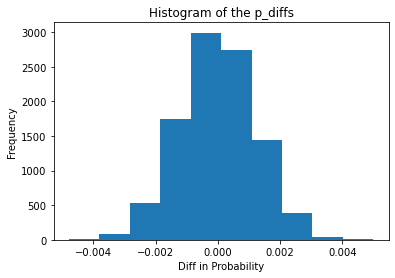

In [51]:
plt.hist(p_diffs)
plt.title("Histogram of the p_diffs")
plt.xlabel('Diff in Probability')
plt.ylabel('Frequency')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [52]:
obs_diffs = (df2['group'][(df2['group'] == 'treatment') & (df2['converted'] == 1)].count() / 
            df2['group'][df2['group'] == 'treatment'].count() - df2['group'][(df2['group'] == 'control') 
                                                                             & (df2['converted'] == 1)].count() / 
            df2['group'][df2['group'] == 'control'].count())
obs_diffs

-0.0015782389853555567

In [53]:
p_value = (obs_diffs < p_diffs).mean()
p_value

0.8997

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The $\alpha$ value it is equal 0.05, and we studied reject the null hypothesis if this p_value were less  $\alpha$ = 0.05**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [54]:
import statsmodels.api as sm

convert_old = len(df2.query('converted==1 and landing_page=="old_page"'))
convert_new = len(df2.query('converted==1 and landing_page=="new_page"'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [55]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value means we accept null hypothesis , that mean the new page are less than or equal to those of the old page and The z-score includes the same information. The p-value found using a traditional z-test and the interpretation of that p-value agrees with the findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [56]:
df2[['ab_page', 'ab_page_dummy']] = pd.get_dummies(df2['landing_page'])
df2['intercept'] = 1
df2 = df2.drop(['ab_page_dummy'], axis=1)
df2.head()

user_id      group landing_page  converted  ab_page  intercept
0   851104    control     old_page          0        0          1
1   804228    control     old_page          0        0          1
2   661590  treatment     new_page          0        1          1
3   853541  treatment     new_page          0        1          1
4   864975    control     old_page          1        0          1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [57]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
fit_model = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [58]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:               8.077e-06
Time:                        13:09:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


***H0: $B_{ab-page}$ = 0***

***H1: $B_{ab-page}$ != 0***


**In the null hypothesis in the previous part, it is calculated Z from one direction only. As for the null hypothesis in the logistic regression, it is calculated Z from two directions, and the method of calculating the p-value in the two parts is different, so the p-value in the first part is equal to 0.9042 and the p-value in the logistic regression part is equal to 0.190.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are no association between ab_page and converted because p-value > alpha=0.05 , we was suggested that a multiple logistic regression be done on the other variables in our data and measure the extent of their effect on the response through the p-value and R Square Adjusted.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [59]:
countries_df = pd.read_csv('countries.csv',header=0)
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
countries_df.head()

user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

In [60]:
df_new.head()

country      group landing_page  converted  ab_page  intercept
user_id                                                               
834778       UK    control     old_page          0        0          1
928468       US  treatment     new_page          0        1          1
822059       UK  treatment     new_page          1        1          1
711597       UK    control     old_page          0        0          1
710616       UK  treatment     new_page          0        1          1

In [61]:
### Create the necessary dummy variables
df_new[['UK','US']] = pd.get_dummies(df_new['country'])[['UK','US']]
df_new.head()

country      group landing_page  converted  ab_page  intercept  UK  US
user_id                                                                       
834778       UK    control     old_page          0        0          1   1   0
928468       US  treatment     new_page          0        1          1   0   1
822059       UK  treatment     new_page          1        1          1   1   0
711597       UK    control     old_page          0        0          1   1   0
710616       UK  treatment     new_page          0        1          1   1   0

In [63]:
### Fit Your Linear Model And Obtain the Results
countries_model = sm.Logit(df_new['converted'],df_new[['intercept', 'ab_page','UK','US']])
result = countries_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:               2.323e-05
Time:                        13:09:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [65]:
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new.head()

country      group landing_page  converted  ab_page  intercept  UK  \
user_id                                                                      
834778       UK    control     old_page          0        0          1   1   
928468       US  treatment     new_page          0        1          1   0   
822059       UK  treatment     new_page          1        1          1   1   
711597       UK    control     old_page          0        0          1   1   
710616       UK  treatment     new_page          0        1          1   1   

         US  UK_ab_page  US_ab_page  
user_id                              
834778    0           0           0  
928468    1           0           1  
822059    0           1           0  
711597    0           0           0  
710616    0           1           0

In [68]:
model2 = sm.Logit(df_new['converted'],df_new[['intercept','UK_ab_page','US_ab_page','ab_page','UK','US']])
result2 = model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:               3.482e-05
Time:                        13:11:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

**There are no association between converted and country (as an overall factor),ab_page because all p-value > alpha=0.05. that there is no a significant difference in conversion based on which page a customer receives and country. and the page is  more converted it is old page With a very small difference with a new page and equal to 0.0001.**